In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('heart-disease.csv')


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print(f'The shape of data is {data.shape}')
print(f'The columns namrs is  {data.columns}')



The shape of data is (303, 14)
The columns namrs is  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [6]:
isnull_number = []
for i in data.columns:
    x = data[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number,index = data.columns,columns=["Total missing value"])


,Total missing value
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
unique_numbers = []
for i in data.columns:
    x = data[i].value_counts().count()
    unique_numbers.append(x)
    
pd.DataFrame(unique_numbers,index = data.columns,columns=["Total unique_numbers "])
        

,Total unique_numbers
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [8]:
numeric_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categoric_var = ['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'slope' , 'ca' , 'thal' , 'target']

In [9]:
data[numeric_var].describe()


,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


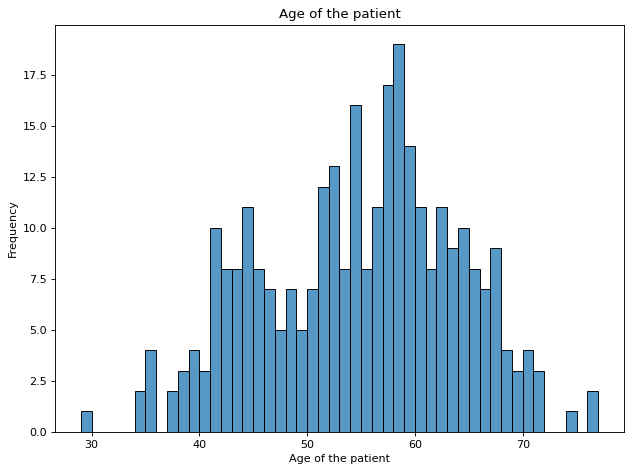

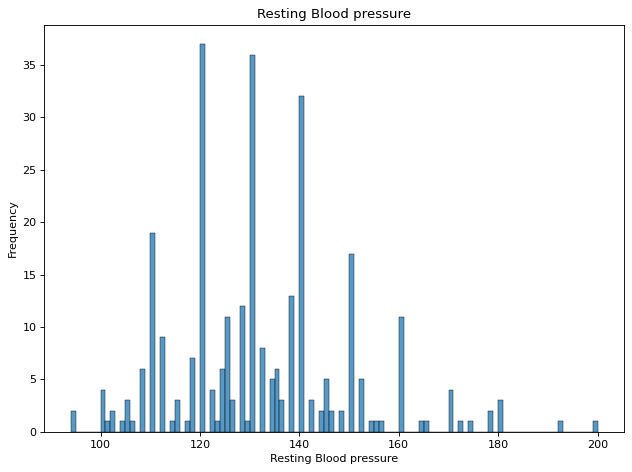

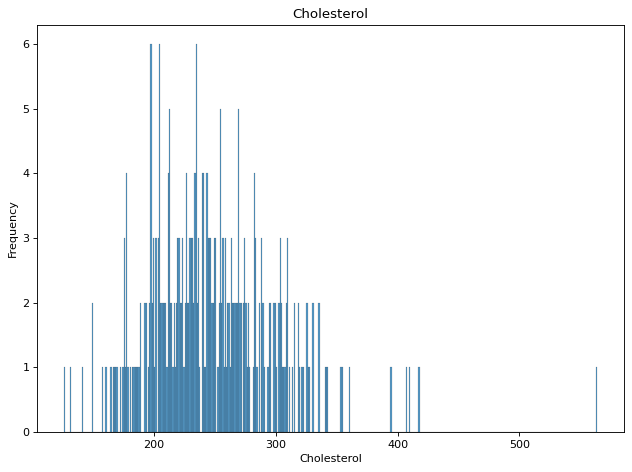

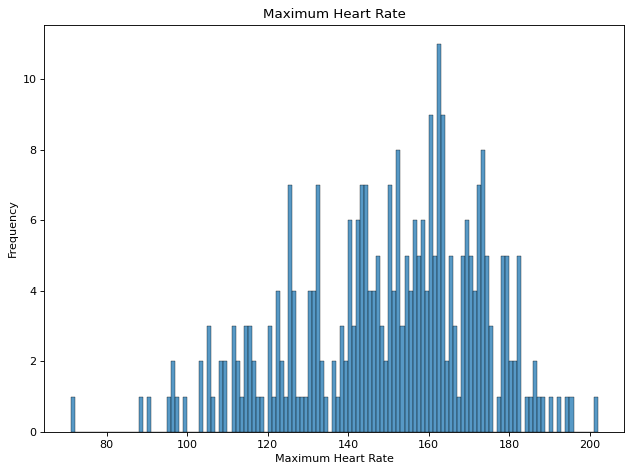

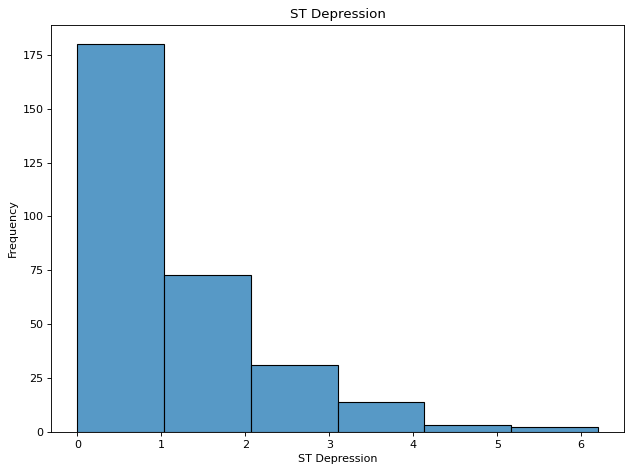

In [10]:
numeric_axis_name = ['Age of the patient','Resting Blood pressure','Cholesterol','Maximum Heart Rate','ST Depression']

for i, z in zip(numeric_var, numeric_axis_name):
    plt.figure(figsize=(8,6), dpi=80)  
    sns.histplot(data[i], kde=False, binwidth=1, edgecolor='k')
    plt.title(z)  
    plt.xlabel(z) 
    plt.ylabel('Frequency')  
    plt.tight_layout()  
    plt.show()  

In [12]:
categoric_axis_name = ['gender','chest pain type','fasting blood sugar','resting electrocal',
                      'exercies induced','the slope of ST','number of major vessels','thal','target']

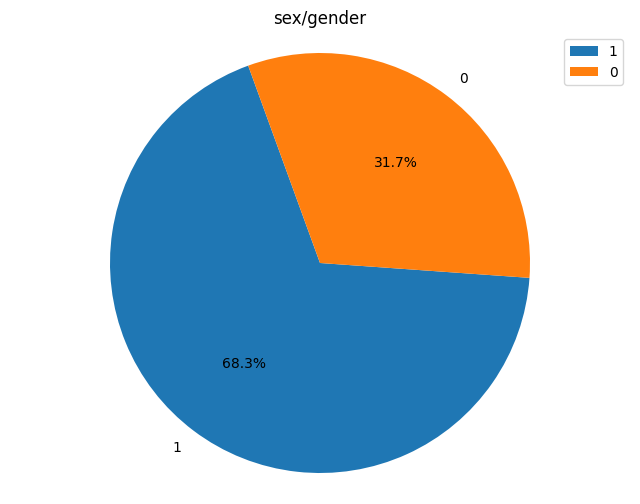

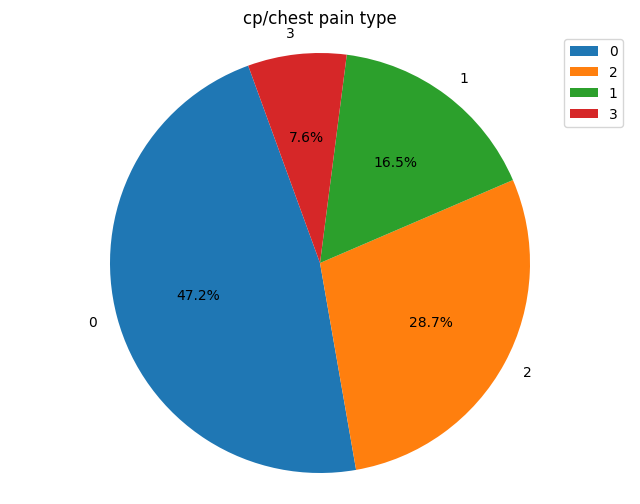

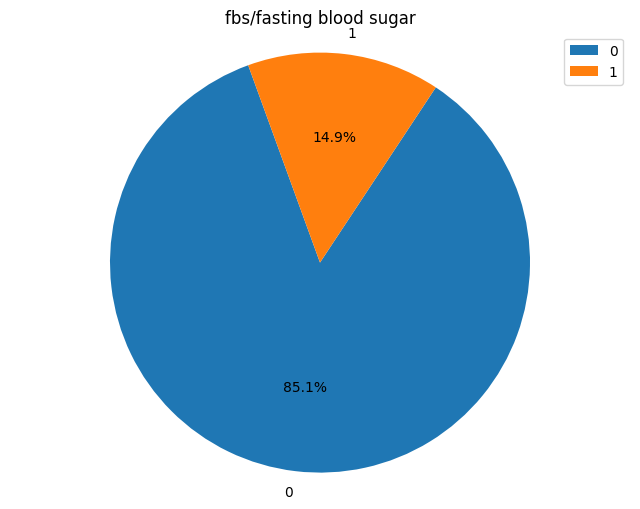

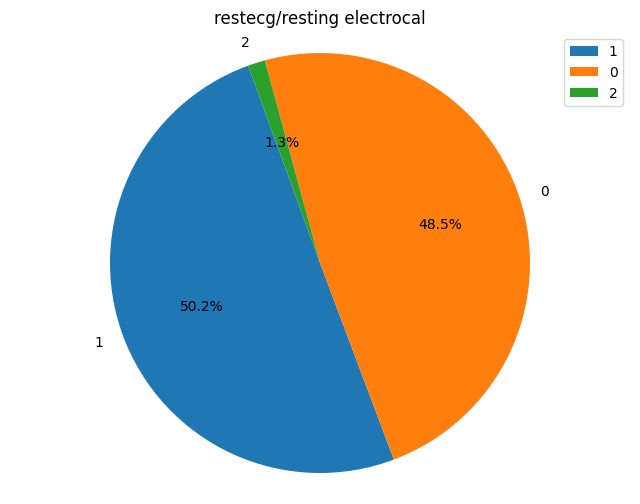

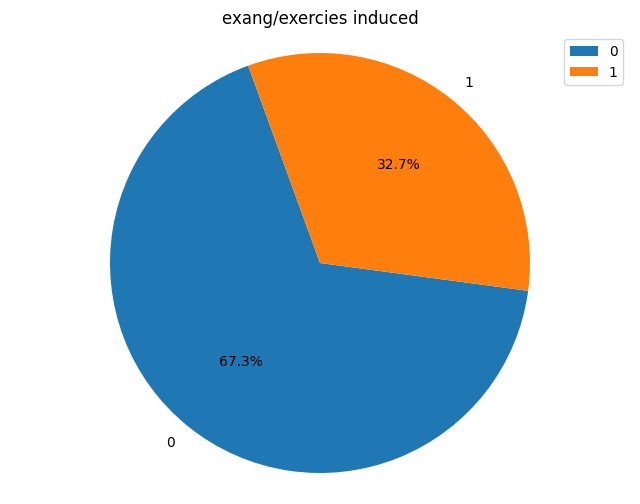

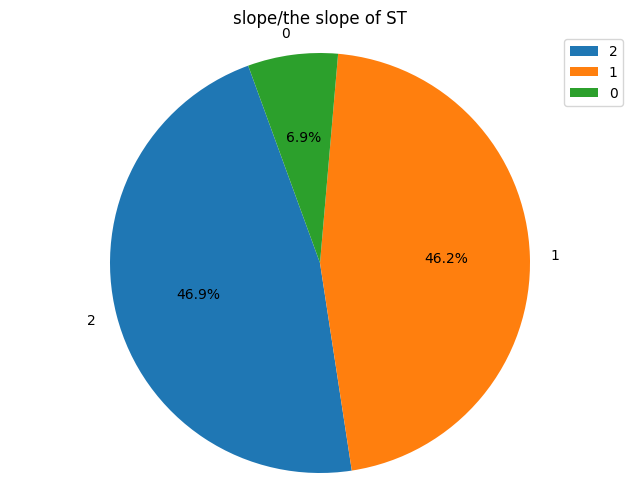

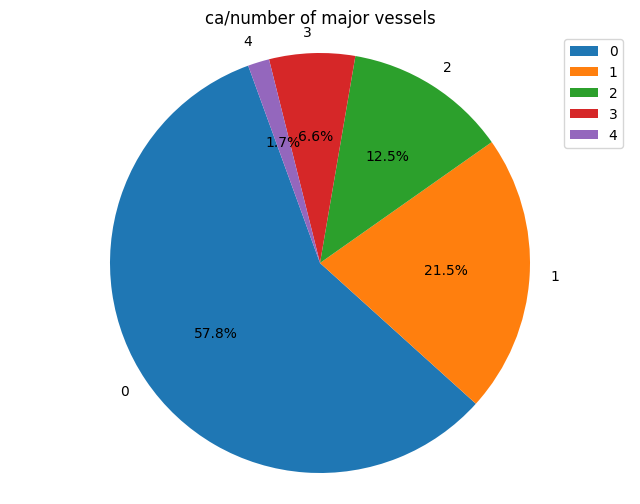

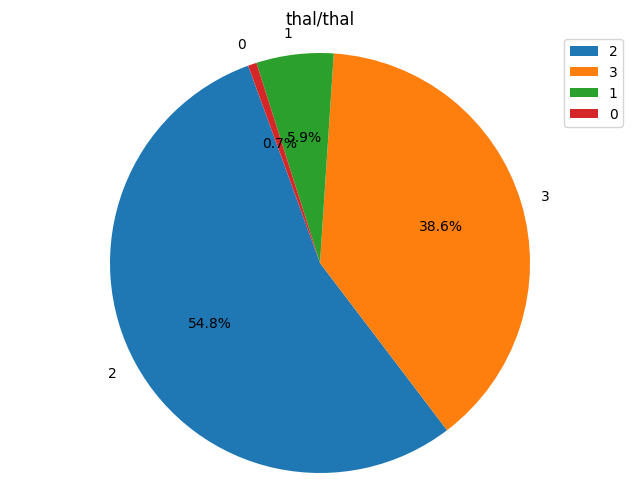

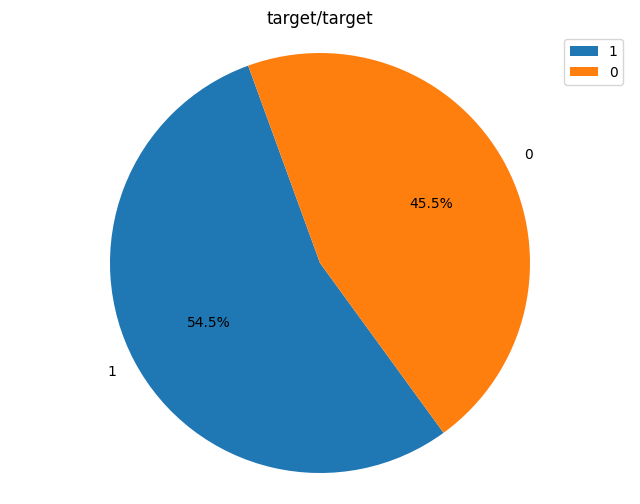

In [13]:
for i , z in zip(categoric_var,categoric_axis_name):
    fig , ax = plt.subplots(figsize=(8,6))
    
    
    observation_value = list(data[i].value_counts().index)
    total_observation = list(data[i].value_counts())
    
    ax.pie(total_observation,labels=observation_value,autopct = '%1.1f%%',startangle=110,labeldistance=1.1)
    ax.axis('equal')
    plt.title(i + '/' + z)
    plt.legend()

In [21]:
data[data['thal'] == 0 ]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [24]:
data['thal'] = data['thal'].replace(0, np.nan)


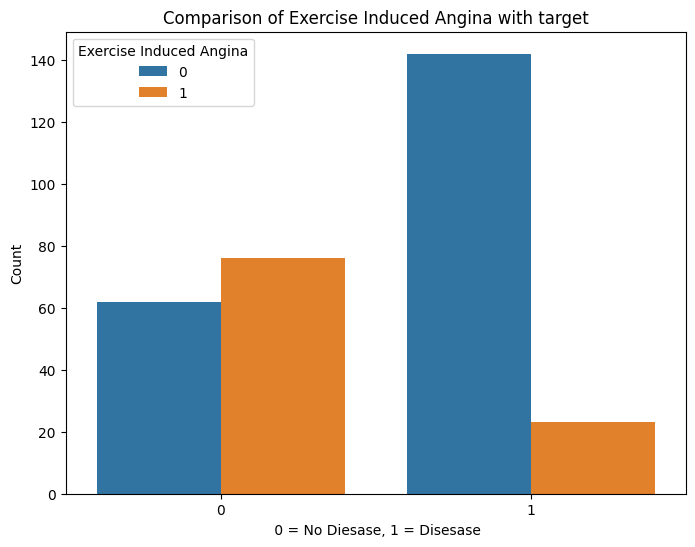

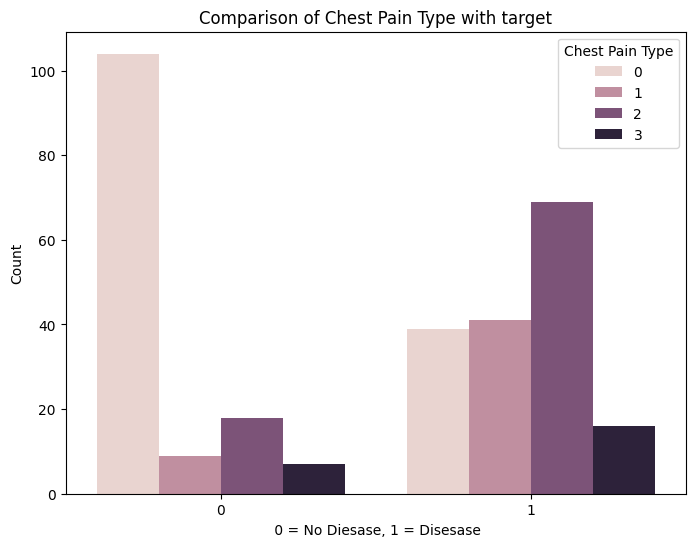

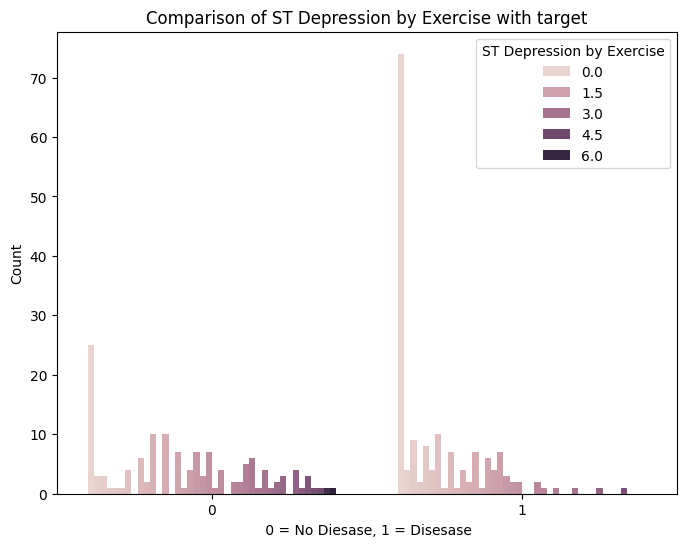

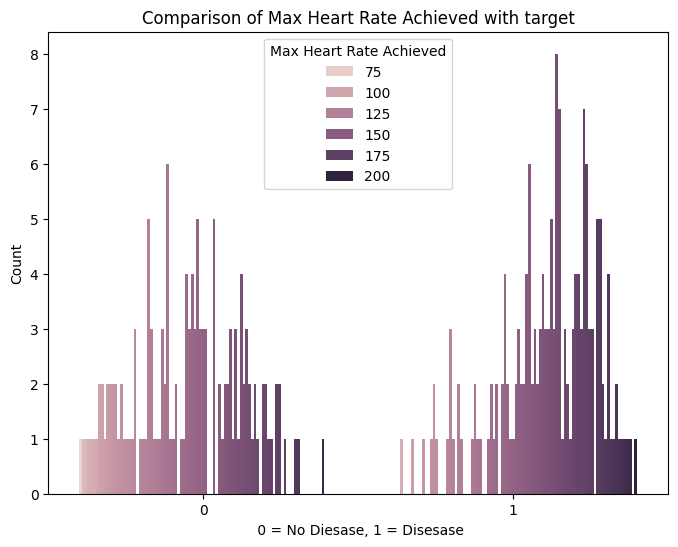

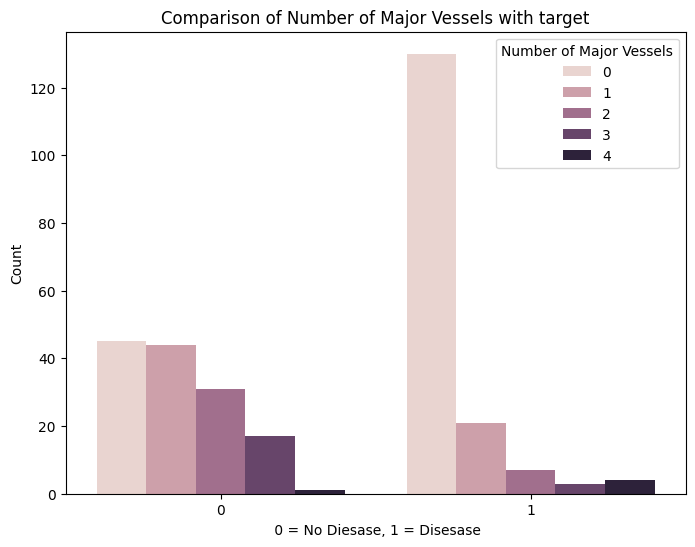

In [30]:
target_column = 'target'

correlations = data.corr()[target_column].abs().sort_values(ascending=False)

top_features = correlations.index[1:6].tolist()

top_feature_axes_name = ['Exercise Induced Angina', 'Chest Pain Type', 'ST Depression by Exercise',
                         'Max Heart Rate Achieved', 'Number of Major Vessels']
for feature, name in zip(top_features, top_feature_axes_name):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_column, hue=feature, data=data)
    plt.title(f'Comparison of {name} with {target_column}')
    plt.xlabel(' 0 = No Diesase, 1 = Disesase')
    plt.ylabel('Count')
    plt.legend(title=name)
    plt.show()

In [ ]:
top_features

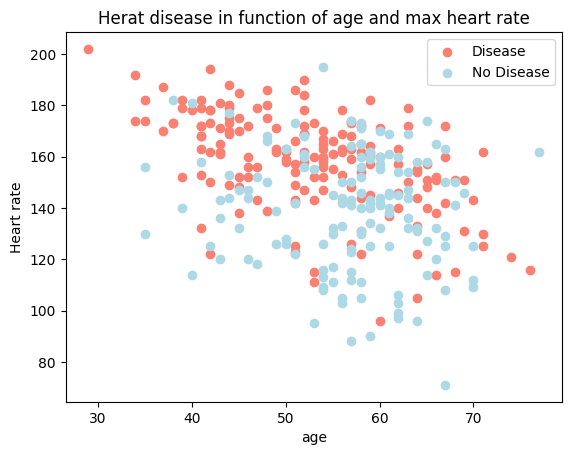

In [31]:
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           c = 'salmon')
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c = 'lightblue')

plt.title('Herat disease in function of age and max heart rate')
plt.xlabel('age')
plt.ylabel('Heart rate')
plt.legend(['Disease','No Disease'])

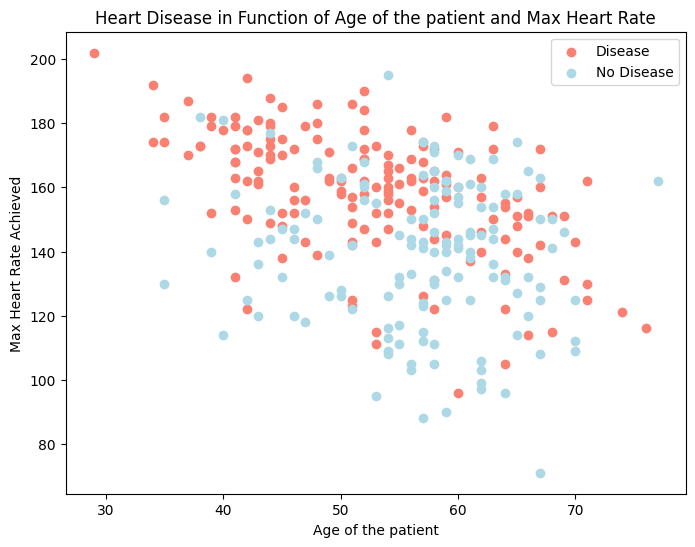

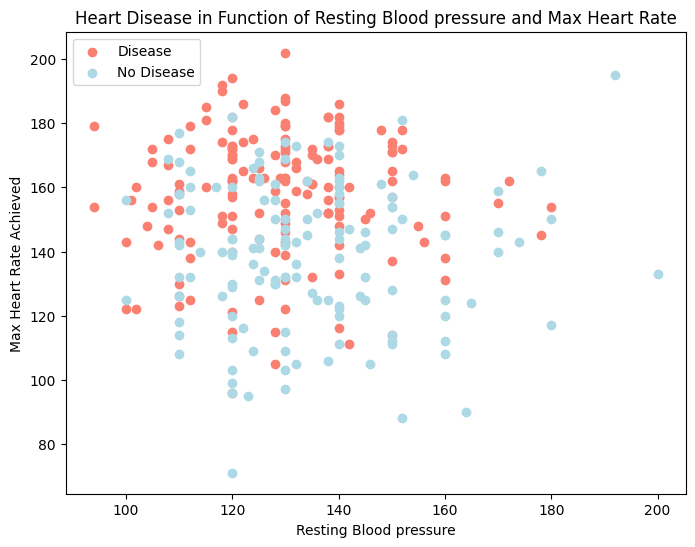

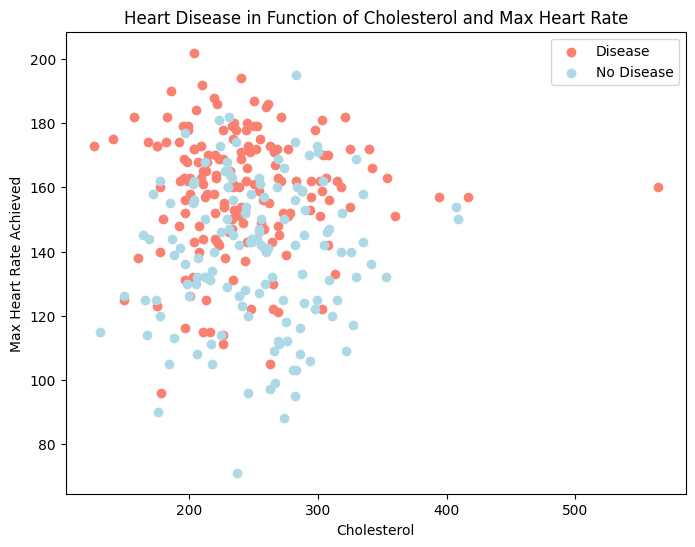

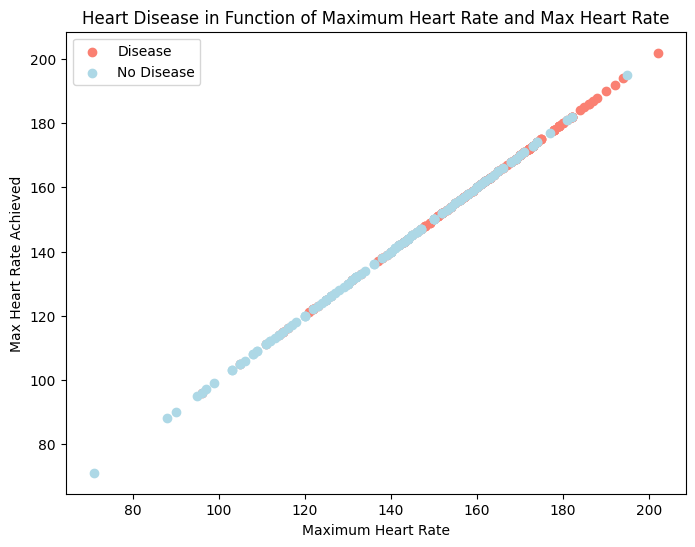

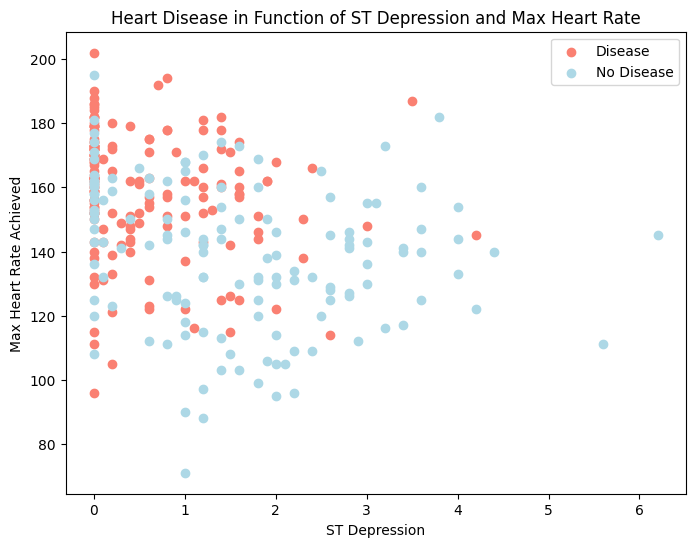

In [36]:
numeric_axis_name = ['Age of the patient','Resting Blood pressure','Cholesterol','Maximum Heart Rate','ST Depression']
numeric_var.append('target')
for i, z in zip(numeric_var[:-1], numeric_axis_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[i][data[target_column] == 1],
                data['thalach'][data[target_column] == 1],
                c='salmon', label='Disease')
    plt.scatter(data[i][data[target_column] == 0],
                data['thalach'][data[target_column] == 0],
                c='lightblue', label='No Disease')
    plt.title(f'Heart Disease in Function of {z} and Max Heart Rate')
    plt.xlabel(z)
    plt.ylabel('Max Heart Rate Achieved')
    plt.legend()
    plt.show()